In [5]:
import numpy as np

sims = 10000
lengths = []
while True:
    try:
        n = int(input("Number of strings in bowl: "))
        break
    except ValueError:
        print("Not a valid input. Please enter an integer.")
full_loops = 0
single_loops = 0

bowl = []
for i in range(1, 2*n, 2):
    bowl.append([i, i + 1])

if n<=50:
     print(f"The initial bowl is: {bowl}")

for _ in range(sims):
    ends = list(range(1,2*n+1))
    bowl = []
    for i in range(1, 2*n, 2):
        bowl.append([i, i + 1])
    loops = []
    while len(ends) > 0:

        pair = []
        ends.sort()

        first_choice = np.random.randint(0, len(ends))
        pair.append(ends[first_choice])
        ends.remove(ends[first_choice])

        second_choice = np.random.randint(0, len(ends))
        pair.append(ends[second_choice])
        ends.remove(ends[second_choice])

        pair.sort()

        for string in bowl:
            if pair[0] in string and pair[1] in string:
                bowl.remove(string)
                loops.append(string)
                break

        new = []
        for string in bowl:
            if pair[0] in string:
                for i in range(len(string)):
                    new.append(string[i])
                bowl.remove(string)
        for string in bowl:
            if pair[1] in string:
                for i in range(len(string)):
                    new.append(string[i])
                bowl.remove(string)
                new.sort()
                bowl.append(new)
                break


        if len(bowl) == 1:
            loops.append(bowl[0])
            bowl.remove(bowl[0])
            
    if len(loops) == 1:
        full_loops += 1
    elif len(loops) == n:
        single_loops += 1
        
p = single_loops/sims
print(f"P(L_{n}={n}) = {p}")
q = full_loops/sims
print(f"P(L_{n}=1) = {q}")

Number of strings in bowl:  51


P(L_51=51) = 0.0
P(L_51=1) = 0.1303


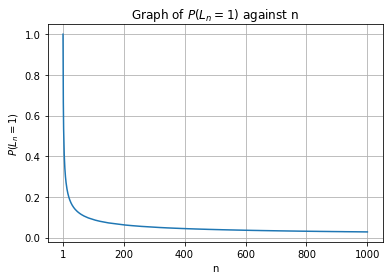

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000
values = [1]

prod = 1
for i in range(2, n+1):
    num = 2*i - 2
    denom = 2*i - 1
    prod *= num / denom
    rounded = round(prod, 4)
    values.append(rounded)

steps = int(n/5)
xticks = [1] + list(np.arange(steps,n+1,step=steps))
plt.plot(range(1, n+1), values)
plt.xlabel('n')
plt.ylabel(r'$P(L_n=1)$')
plt.title(r'Graph of $P(L_n=1)$ against n')
plt.grid(True)
plt.xticks(xticks)
plt.show()  

In [10]:
import numpy as np
import time

s = time.time()

sims = 10000  
lengths = []
while True:
    try:
        n = int(input("Number of strings in bowl: "))
        break
    except ValueError:
        print("Not a valid input. Please enter an integer.")
bowl = []
for i in range(1, 2*n, 2):
    bowl.append([i, i + 1])

if n<=10:
     print(f"The initial bowl is: {bowl}")

for _ in range(sims):
    ends = list(range(1,2*n+1))
    bowl = []
    for i in range(1, 2*n, 2):
        bowl.append([i, i + 1])
    loops = []
    while len(ends) > 0:

        pair = []
        ends.sort()

        first_choice = np.random.randint(0, len(ends))
        pair.append(ends[first_choice])
        ends.remove(ends[first_choice])

        second_choice = np.random.randint(0, len(ends))
        pair.append(ends[second_choice])
        ends.remove(ends[second_choice])

        pair.sort()

        for string in bowl:
            if pair[0] in string and pair[1] in string:
                bowl.remove(string)
                loops.append(string)
                break

        new = []
        for string in bowl:
            if pair[0] in string:
                for i in range(len(string)):
                    new.append(string[i])
                bowl.remove(string)
        for string in bowl:
            if pair[1] in string:
                for i in range(len(string)):
                    new.append(string[i])
                bowl.remove(string)
                new.sort()
                bowl.append(new)
                break


        if len(bowl) == 1:
            loops.append(bowl[0])
            bowl.remove(bowl[0])

    lengths.append(len(loops))
    if sims < 11 and n < 51:
        print(f"The loops created are: {loops}")



print(f"E[L_{n}] = {sum(lengths)/len(lengths)}")

f = time.time()
e = f - s
print()
print(f"Time taken: {e:.4f} seconds")

Number of strings in bowl:  142


E[L_142] = 3.4421

Time taken: 47.2528 seconds


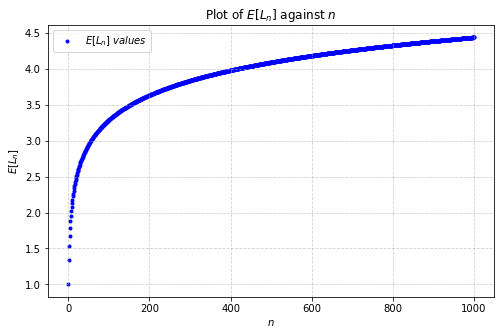

In [56]:
import numpy as np
import matplotlib.pyplot as plt


EL_n = [1]
k = 1000

for i in range(k):
    EL_n.append(round(EL_n[i] + (1 / (2 * i + 3)), 5))


x_values = list(range(k + 1))


plt.figure(figsize=(8, 5))
plt.scatter(x_values, EL_n, color='b', marker='.', label=r"$E[L_n]\ values$")


plt.xlabel(r"$n$")
plt.ylabel(r"$E[L_n]$")
plt.title(r"Plot of $E[L_n]$ against $n$")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)


plt.show()


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib

def euler():
    return 0.5772156649

k = 100000
EL_n = [1]
for i in range(1, k + 1):
    EL_n.append(round(EL_n[i - 1] + (1 / (2 * i + 1)), 8))

x_values = np.arange(1, k + 1)

fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(bottom=0.25)

k_factor_init = 1
ln_values = np.log(k_factor_init * x_values)

scatter_plot, = ax.plot(range(k + 1), EL_n, 'b.', markersize=1, label=r"$E[L_n]$ values")
ln_plot, = ax.plot(x_values, ln_values, 'g-', label=r"$y = \log(kx)$")
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$E[L_n]$")
ax.set_title(r"Plot of $E[L_n]$ and $E[L_n] =\log(kn)$")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, '$k$', valmin=0.1, valmax=5, valinit=1, valstep=0.1)

def update(val):
    k_factor = slider.val
    ln_plot.set_ydata(np.log(k_factor * x_values))
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

Using matplotlib backend: Qt5Agg


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib

def euler():
    return 0.5772156649

k = 100000
EL_n = [1]
for i in range(1, k + 1):
    EL_n.append(round(EL_n[i - 1] + (1 / (2 * i + 1)), 8))

x_values = np.arange(1, k + 1)

fig, ax = plt.subplots(figsize=(8, 5))
plt.subplots_adjust(bottom=0.25)

k_factor_init = 1
ln_values = (1/k_factor)*np.log(k_factor_init * x_values)

scatter_plot, = ax.plot(range(k + 1), EL_n, 'b.', markersize=1, label=r"$E[L_n]$ values")
ln_plot, = ax.plot(x_values, ln_values, 'g-', label=r"$y = \frac{1}{k}\log(kx)$")
ax.set_xlabel(r"$n$")
ax.set_ylabel(r"$E[L_n]$, $y$")
ax.set_title(r"Plot of $E[L_n]$ and $y =\frac{1}{k}\log(kx)$")
ax.legend()
ax.grid(True, linestyle="--", alpha=0.6)

ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
slider = Slider(ax_slider, '$k$', valmin=1, valmax=5, valinit=1, valstep=0.5)

def update(val):
    k_factor = slider.val
    ln_plot.set_ydata((1/k_factor)*np.log(k_factor * x_values))
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()


Using matplotlib backend: Qt5Agg


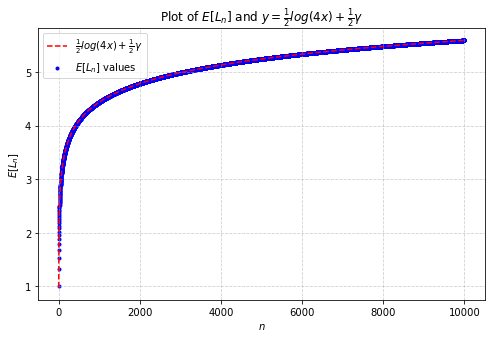

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def euler():
    return 0.5772156649

EL_n = [1]
k = 10000

for i in range(1, k + 1):
    EL_n.append(round(EL_n[i - 1] + (1 / (2 * i + 1)), 8))

x_values = np.arange(1, k + 1)
y_values = 0.5 * np.log(4 * x_values) + 0.5*euler()

plt.figure(figsize=(8, 5))
plt.scatter(range(k + 1), EL_n, color='b', marker='.', label=r"$E[L_n]$ values")
plt.plot(x_values, y_values, color='r', linestyle='--', label=r"$\frac{1}{2}log(4x)+\frac{1}{2}\gamma$")

plt.xlabel(r"$n$")
plt.ylabel(r"$E[L_n]$")
plt.title(r"Plot of $E[L_n]$ and $y = \frac{1}{2}log(4x)+\frac{1}{2}\gamma$")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()